In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import animation

%matplotlib notebook
NUM_NEIGHB =99
def get_site(coord, L):
    return coord[0]*L+coord[1]


def get_coord(site, L):
    x = site // L
    y = site % L
    return [x, y]


def get_neighbors(site, L,R):
    neighb = set()
    x, y = get_coord(site, L)
    for i in range(-round(R)-1, round(R)+2):
        for j in range(-round(R)-1, round(R)+2):
            x1 = (x + i)
            y1 = (y + j)
            if (x-x1)**2 + (y-y1)**2 <= R**2 :
                x1=x1%L
                y1=y1%L
                neighb.add(get_site([x1, y1], L))
    
    return list(neighb)
    
def tabulate_neighbors(L,R):
    Nsite = L**2
    NUM_NEIGHB= len(get_neighbors(0,L,R))
    print (NUM_NEIGHB)
    neighb = np.empty((Nsite, NUM_NEIGHB), dtype=int)
    for site in range(Nsite):
        neighb[site, :] = get_neighbors(site, L,R)
    return neighb




In [39]:

L=100
R=2
N=tabulate_neighbors(L,R)


13


In [23]:
get_neighbors(0,L,R)

[0, 1, 98, 99, 2, 100, 101, 199, 9800, 200, 9900, 9901, 9999]

In [24]:
N[0]

array([   0,    1,   98,   99,    2,  100,  101,  199, 9800,  200, 9900,
       9901, 9999])

In [25]:
def evolve2(field, neighbors, b, num_steps=1):
    
    L = field.shape[0]
    
    field = field.flatten()
    SIZE = len(field)
    current = np.zeros((SIZE), dtype=int)
    scores = np.zeros((SIZE), dtype=float)
    for step in range(num_steps):
        current = field.copy()
        scores = np.zeros((SIZE), dtype=float)
        for site in range(SIZE):
            for site1 in neighbors[site]:
                scores[site] += (1 - field[site1])
                
            if field[site] == 1:
                scores[site] *= b
                
        for site in range(SIZE):
            best_site = site
            for site1 in neighbors[site]:
                if (scores[best_site] < scores[site1]):
                    best_site = site1
                    
            field[site] = current[best_site]
    return np.reshape(field, (L,L))

In [26]:
rndm = np.random.RandomState(12345)
field = (rndm.uniform(size=(L,L)) > 0.5).astype(int)
field

array([[1, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1]])

In [27]:
field=evolve2(field,N,3,100)
field.sum()/(L**2)


KeyboardInterrupt: 

In [28]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [29]:
%%cython -a

import numpy as np

import cython

@cython.cdivision(True)
@cython.boundscheck(False)
@cython.wraparound(False)
def evolve2_1(grid_orig, long[:, :] neighbors, double b, int num_steps=1):
    cdef int L = grid_orig.shape[0]
    cdef int N_NEIGHB=len(neighbors[0])
    cdef short[:] grid = grid_orig.flatten()
    
    cdef int SIZE, step, site, site1, best_site, i
    SIZE = L*L
    cdef short[:] current = grid.copy()
    cdef double[:] _zeros = np.zeros((SIZE), dtype=float)
    cdef double[:] scores = np.zeros((SIZE), dtype=float)
    
    for step in range(num_steps):
        current = grid.copy()
        scores[...] = _zeros
        for site in range(SIZE):
            for i in range(N_NEIGHB):
                site1 = neighbors[site,i]
                scores[site] += (1 - grid[site1])
                
            if grid[site] == 1:
                scores[site] *= b
        
        for site in range(SIZE):
            best_site = site
            for i in range(N_NEIGHB):
                site1 = neighbors[site,i]
                if (scores[best_site] < scores[site1]):
                    best_site = site1
                    
            grid[site] = current[best_site]
    grid_orig = np.array(grid)
    return np.reshape(grid_orig, (L,L))

<IPython.core.display.Javascript object>


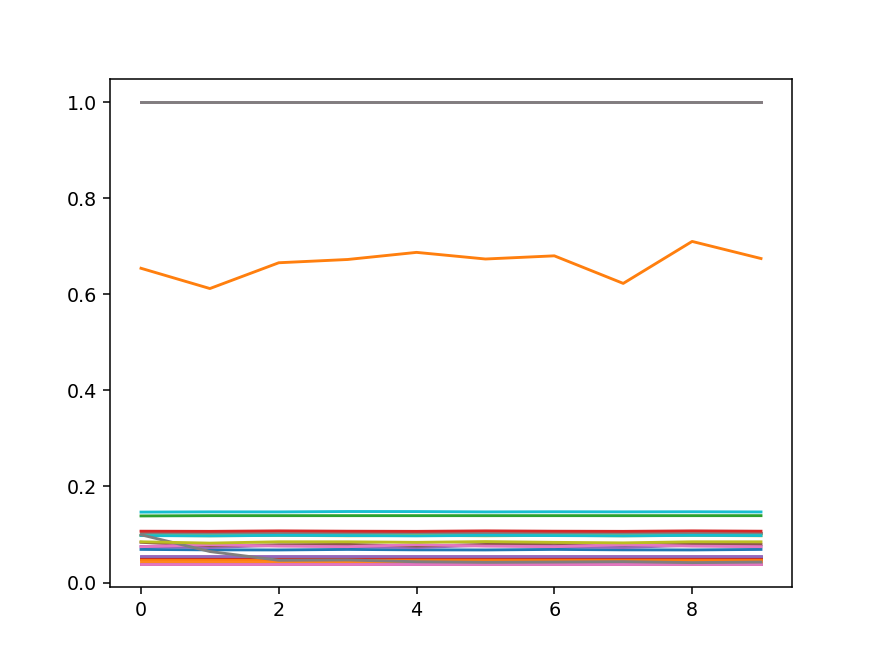

In [30]:
 %matplotlib notebook
B = set()
for c1 in range(14):
    for c2 in range(1, 14):
        if c1/c2 > 1 and c1 / c2 < 3:
            B.add((c1/c2) + 0.000000001)
B = sorted(list(B))
A=[]
rndm = np.random.RandomState(12345)
for b in B:
    A.append([])
    field = (rndm.uniform(size=(L,L)) > 0.5).astype("int16")
    for i in range(10):
        field=evolve2_1(field,N,b,100)
        A[-1].append(field.sum()/(L**2))
for i in range(len(B)):
    plt.plot( range(len(A[i])),A[i])
    plt.show()
     

<IPython.core.display.Javascript object>


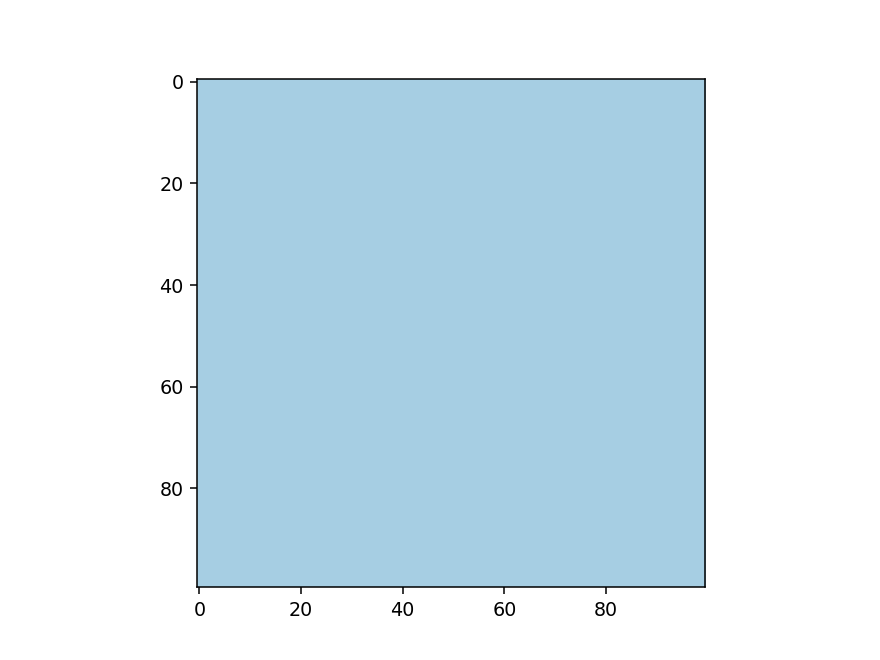

In [31]:
fig = plt.figure()
im = plt.imshow(field,  cmap=plt.get_cmap('Paired'))

In [32]:
B = set()
for c1 in range(30):
    for c2 in range(1, 30):
        if c1/c2 > 1 and c1 / c2 < 3:
            B.add((c1/c2) + 0.000000001)
B = sorted(list(B))
A=[]
rndm = np.random.RandomState(12345)
for b in B:
    A.append([])
    field = (rndm.uniform(size=(L,L)) > 0.5).astype("int16")
    for i in range(400):
        field=evolve2_1(field,N,b,5)
        A[-1].append(field.sum()/(L**2))
        
        

<IPython.core.display.Javascript object>


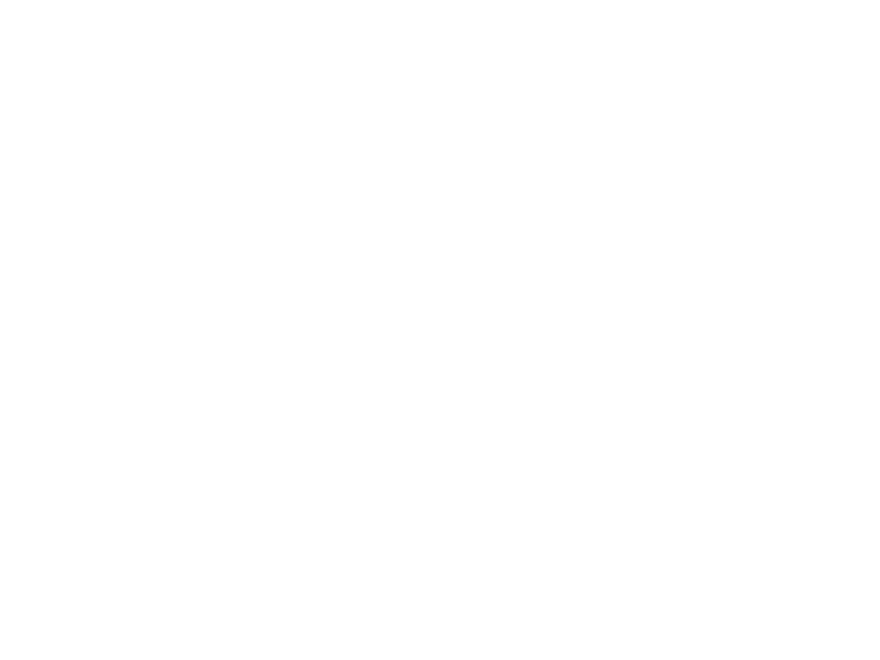

In [33]:
%matplotlib notebook
for i in range(len(B)):
    plt.plot( range(len(A[i])),A[i])
    plt.show()

In [38]:
 %matplotlib notebook
B = set()
for c1 in range(14):
    for c2 in range(1, 14):
        if c1/c2 > 1 and c1 / c2 < 3:
            B.add((c1/c2) + 0.000000001)
B = sorted(list(B))
A=[]
rndm = np.random.RandomState(12345)
for b in B:
    A.append([])
    field = (rndm.uniform(size=(L,L)) > 0.5).astype("int16")
    for i in range(13):
        field=evolve2_1(field,N,b,100)
        A[-1].append(field.sum()/(L**2))
for i in range(len(B)):
    plt.plot( range(len(A[i])),A[i])
    plt.show()
     


KeyboardInterrupt: 

In [35]:
summ=0
M=[0]*len(B)
for i in range(len(B)):
    summ=0
    M[i]=0
    for c in range(2,8):
        summ=summ+A[i][c]
    M[i]=summ/6
    print(M[i])

0.0535
0.0409
0.050499999999999996
0.048499999999999995
0.05530000000000001
0.038
0.038200000000000005
0.1042
0.0978
0.09773333333333334
0.06833333333333334
0.0478
0.1393
0.10703333333333333
0.07533333333333334
0.07886666666666665
0.0765
0.04416666666666666
0.08416666666666667
0.14741666666666667
1.0
0.6671666666666667
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


<IPython.core.display.Javascript object>


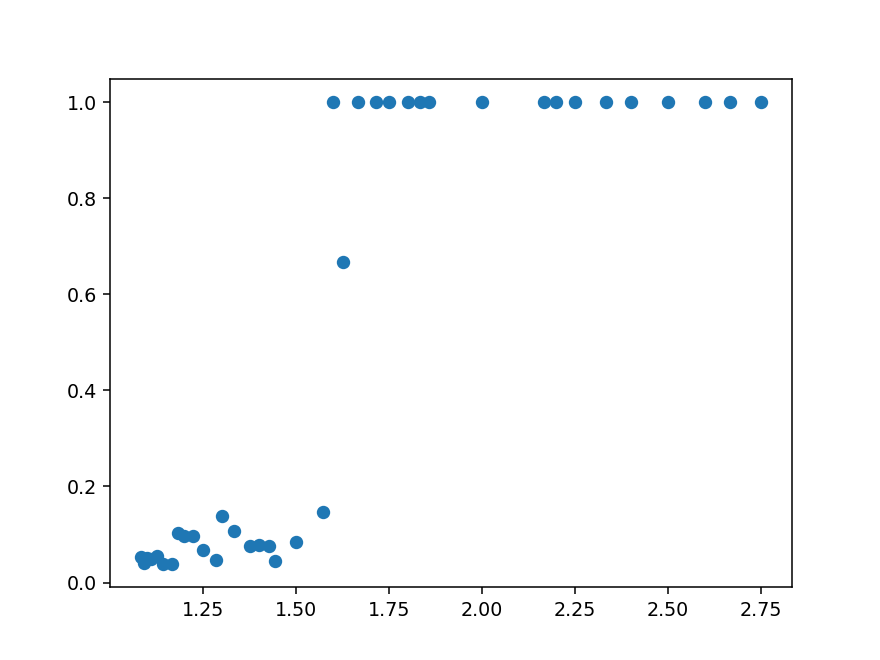

<function matplotlib.pyplot.show(*args, **kw)>

In [37]:
plt.plot(B,M,'o')
plt.show